<a href="https://colab.research.google.com/github/sss2107/PROJECT_HRA/blob/main/%5BFINAL%5DModeling_1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Employee Churn Prediction

## ## Settings

In [ ]:
import math
import time
from datetime import datetime
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

import warnings
import missingno as msno

from scipy import stats
import statsmodels.formula.api as smf
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_error, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC 
from sklearn_pandas import DataFrameMapper, gen_features, cross_validation

pd.set_option('max_columns', None)
pd.set_option('max_rows', None)
pd.set_option('display.max_colwidth', -1)  
pd.options.display.max_columns = 100 
pd.options.display.max_rows = 1000 
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus']=False
plt.style.use('ggplot')   # fivethirtyeight
psd = lambda q: sqldf(q, gloabls())
py.init_notebook_mode(connected=True)
warnings.filterwarnings('ignore')



def null_check_for_loop(df):
    for col in df.columns :
        msg = 'column: {:<30}\t Percent of NaN value: {:.2f}%'.format(col, 100*(df[col].isnull().sum() / df[col].shape[0]))
        print(msg)

def dov(df):
    display(df.shape, df.head(2))


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: FutureWarning:

Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.



## ## Data Overview

In [ ]:
d_orig = pd.read_csv('./data/employee_attrition_ibm_data.csv')
d = d_orig.copy()
dov(d)

FileNotFoundError: ignored

In [ ]:
# d.head(5).T

#### null check

In [ ]:
# null_check_msno_bar(d)

In [ ]:
# null_check_for_loop(d)

In [ ]:
null_check_for_loop(d)

column: Age                           	 Percent of NaN value: 0.00%
column: Attrition                     	 Percent of NaN value: 0.00%
column: BusinessTravel                	 Percent of NaN value: 0.00%
column: DailyRate                     	 Percent of NaN value: 0.00%
column: Department                    	 Percent of NaN value: 0.00%
column: DistanceFromHome              	 Percent of NaN value: 0.00%
column: Education                     	 Percent of NaN value: 0.00%
column: EducationField                	 Percent of NaN value: 0.00%
column: EmployeeCount                 	 Percent of NaN value: 0.00%
column: EmployeeNumber                	 Percent of NaN value: 0.00%
column: EnvironmentSatisfaction       	 Percent of NaN value: 0.00%
column: Gender                        	 Percent of NaN value: 0.00%
column: HourlyRate                    	 Percent of NaN value: 0.00%
column: JobInvolvement                	 Percent of NaN value: 0.00%
column: JobLevel                      	 Percent 

#### peek

In [ ]:
# d.info()

In [ ]:
d.describe(include='all')   

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,NaN,2,NaN,NaN,NaN,9,NaN,3,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,NaN,Male,NaN,NaN,NaN,Sales Executive,NaN,Married,NaN,NaN,NaN,Y,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,NaN,882,NaN,NaN,NaN,326,NaN,673,NaN,NaN,NaN,1470,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,2.721769,NaN,65.891156,2.729932,2.063946,NaN,2.728571,NaN,6502.931293,14313.103401,2.693197,NaN,NaN,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,1.093082,NaN,20.329428,0.711561,1.106940,NaN,1.102846,NaN,4707.956783,7117.786044,2.498009,NaN,NaN,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,1.000000,NaN,30.000000,1.000000,1.000000,NaN,1.000000,NaN,1009.000000,2094.000000,0.000000,NaN,NaN,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,2.000000,NaN,48.000000,2.000000,1.000000,NaN,2.000000,NaN,2911.000000,8047.000000,1.000000,NaN,NaN,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,3.000000,NaN,66.000000,3.000000,2.000000,NaN,3.000000,NaN,4919.000000,14235.500000,2.000000,NaN,NaN,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,4.000000,NaN,83.750000,3.000000,3.000000,NaN,4.000000,NaN,8379.000000,20461.500000,4.000000,NaN,NaN,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


#### target variable

In [ ]:
d.Attrition.value_counts()

No     1233
Yes    237 
Name: Attrition, dtype: int64

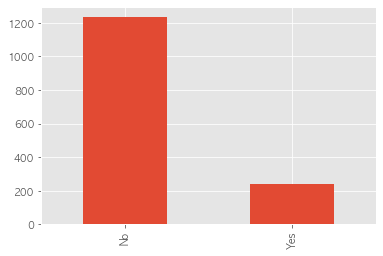

In [ ]:
d.Attrition.value_counts().plot(kind='bar')

# ## Basic Common Processing

In [ ]:
# Reassign target
d.Attrition.replace(to_replace = dict(Yes = 1, No = 0), inplace = True)
d.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7


In [ ]:
# find useless features
li_useless_feat = []
for col in list(d.columns):
    if d[col].nunique() == 1:
        li_useless_feat.append(col)
        print(col, end=' / ')


# delete useless features
d.drop(columns=li_useless_feat, inplace=True)
d.head(2)

EmployeeCount / Over18 / StandardHours / 

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7


In [ ]:
# d.corr().style.background_gradient(cmap='coolwarm')

In [ ]:
d.corr().Attrition.sort_values().head(10)

TotalWorkingYears      -0.171063
JobLevel               -0.169105
YearsInCurrentRole     -0.160545
MonthlyIncome          -0.159840
Age                    -0.159205
YearsWithCurrManager   -0.156199
StockOptionLevel       -0.137145
YearsAtCompany         -0.134392
JobInvolvement         -0.130016
JobSatisfaction        -0.103481
Name: Attrition, dtype: float64

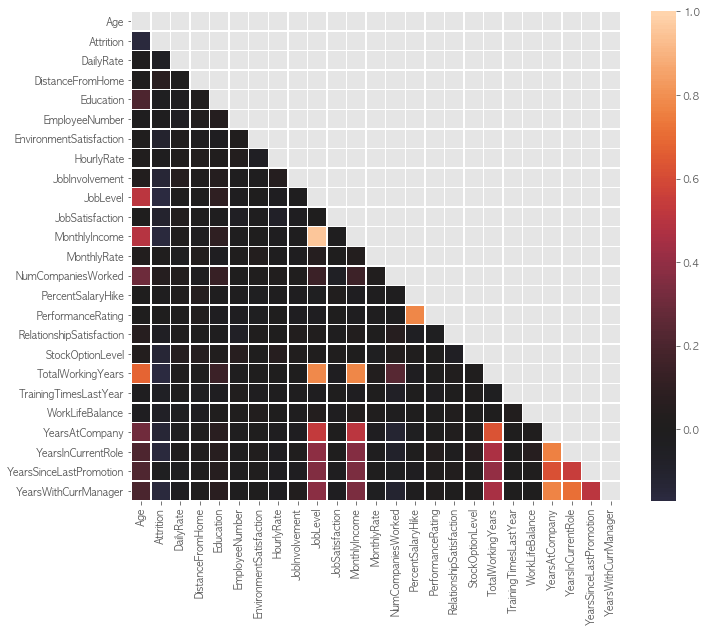

In [ ]:
# Subset the dataset into all the numerical values
numeric_hr = d.select_dtypes(include=[np.number])

# Compete the correlation matrix
corr = numeric_hr._get_numeric_data().corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# # Generate a custom diverging colormap
# cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
heatmap = sns.heatmap(corr, mask=mask, center=0.0,   # cmap=cmap, 
                      vmax = 1, square=True, linewidths=.5, ax=ax)
plt.show()

# ## Prediction / Modeling

#### Dummy Encoding

In [ ]:
# d.select_dtypes(include='object')

In [ ]:
#Encode the categorical variables so that scikit-learn can read them
col_categorical = list(d.select_dtypes(include='object').columns)
col_categorical
d=pd.get_dummies(data=d,columns=col_categorical,drop_first=True)
d.head(3)

#### Randomforest Classification

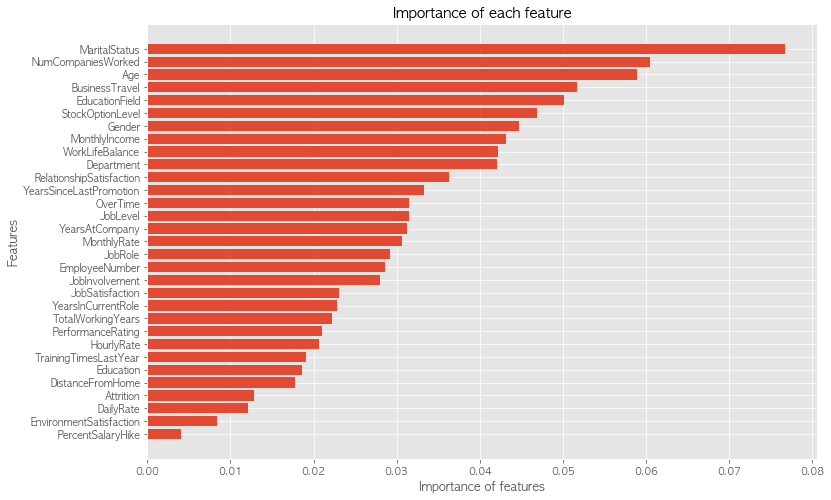

In [ ]:
rf = RandomForestClassifier(class_weight="balanced", n_estimators=500) 
rf.fit(d.drop(['Attrition'],axis=1), d.Attrition)
importances = rf.feature_importances_
names = d.columns
importances, names = zip(*sorted(zip(importances, names)))

# Lets plot this
plt.figure(figsize=(12,8))
plt.barh(range(len(names)), importances, align = 'center')
plt.yticks(range(len(names)), names)
plt.xlabel('Importance of features')
plt.ylabel('Features')
plt.title('Importance of each feature')
plt.show()

#### Prediction / k-fold-CV (k=10)

In [ ]:
# Make predictions using 10-K-Fold-CV

# Baseline:
print((d.Attrition.value_counts()/(d.shape[0]))*100)

# Accuracy
scores = cross_val_score(rf, d.drop(['Attrition'],axis=1), d.Attrition, cv=10, scoring='accuracy')
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

# ROC
scores = cross_val_score(rf, d.drop(['Attrition'],axis=1), d.Attrition, cv=10, scoring='roc_auc')
print(scores)
print("ROC_AUC: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

0    83.877551
1    16.122449
Name: Attrition, dtype: float64
[0.85034014 0.83673469 0.85034014 0.84353741 0.8707483  0.85714286
 0.84353741 0.87755102 0.84353741 0.86394558]
Accuracy: 0.85 (+/- 0.03)
[0.83739837 0.81605691 0.83553523 0.73001355 0.8495935  0.75643631
 0.79251355 0.74298738 0.86079944 0.7950561 ]
ROC_AUC: 0.80 (+/- 0.09)


#### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# fit classification tree
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth = 7, random_state = 1, criterion="entropy")
dtc_model=dtc.fit(X_train,y_train)
# evaluate in the test data
y_pred=dtc_model.predict(X_test)
print("Accuracy of Classification Tree: ",accuracy_score(y_test, y_pred))

fn = X_test.columns.values
cn = y_test.unique()
plt.figure(figsize = (16,10))
plot_tree(dtc_model,impurity = True, filled = True, fontsize=10)
#plot_tree(dtc_model, feature_names = str(X.columns.values))